In [1]:
import sys

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.GeometryUtils as gu

tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.167337,0.679647,0.670791,0.220305,0.547861,0.668001,0.132016,0.021367,0.239961,0.709214,...,0.929909,0.929361,0.236323,0.397553,0.697476,0.199938,0.038617,0.400435,2965.077917,1
1,0.483400,0.866152,0.034566,0.357319,0.710098,0.967271,0.711290,0.657067,0.078343,0.046822,...,0.425621,0.146762,0.231055,0.702600,0.063830,0.883613,0.208142,0.891782,3638.412215,1
2,0.539505,0.971237,0.872282,0.997476,0.876021,0.924731,0.252684,0.102044,0.117308,0.589282,...,0.910795,0.401651,0.757494,0.718752,0.556175,0.574333,0.836209,0.115295,3854.981368,1
3,0.421506,0.062655,0.414892,0.902571,0.250978,0.125226,0.330475,0.984070,0.425299,0.604996,...,0.385320,0.409306,0.611803,0.321513,0.666607,0.778535,0.475778,0.058373,2921.572188,1
4,0.316895,0.205977,0.633542,0.363309,0.924912,0.961134,0.839830,0.602389,0.497438,0.197058,...,0.622288,0.919163,0.600670,0.960608,0.197271,0.776129,0.330159,0.349447,3537.345337,1


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,0.498774,0.500015,0.498005,0.499708,0.500804,0.500639,0.501354,0.500027,0.500476,0.498237,...,0.499896,0.499754,4.995963e-01,0.500074,0.498789,0.501204,0.499110,0.499364,2999.983149,1.0
std,0.294365,0.293562,0.293846,0.293527,0.294094,0.293561,0.293999,0.293518,0.293520,0.293485,...,0.293351,0.293252,2.935062e-01,0.293819,0.294636,0.294028,0.293609,0.293632,577.385657,0.0
min,0.000012,0.000013,0.000012,0.000012,0.000002,0.000003,0.000006,0.000027,0.000018,0.000007,...,0.000010,0.000003,5.834736e-07,0.000001,0.000010,0.000012,0.000016,0.000007,2000.073501,1.0
25%,0.239041,0.241448,0.238198,0.240839,0.242057,0.241709,0.242036,0.241196,0.239767,0.239149,...,0.241978,0.242598,2.401660e-01,0.240595,0.238538,0.242075,0.240654,0.240109,2500.001435,1.0
50%,0.497669,0.498925,0.497835,0.500324,0.500726,0.499913,0.502828,0.500490,0.501837,0.498134,...,0.498325,0.497434,4.988918e-01,0.500525,0.498337,0.500055,0.498312,0.498081,3000.004107,1.0
75%,0.758348,0.758336,0.756201,0.757153,0.759284,0.760614,0.759592,0.758609,0.758062,0.756567,...,0.758490,0.758701,7.586959e-01,0.760026,0.758774,0.760680,0.757993,0.759021,3499.984238,1.0
max,0.999995,0.999986,0.999991,0.999985,0.999994,0.999994,0.999987,0.999996,0.999996,0.999993,...,0.999996,0.999995,9.999981e-01,0.999994,0.999982,0.999997,0.999992,0.999972,3999.969684,1.0


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 0.00%
Percentage of entries with HasIntersection = 1: 100.00%


#### Coordinates precision

In [5]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 8 decimal places
Max coordinate precision in the dataset: 16 decimal places


#### Coordinates distribution

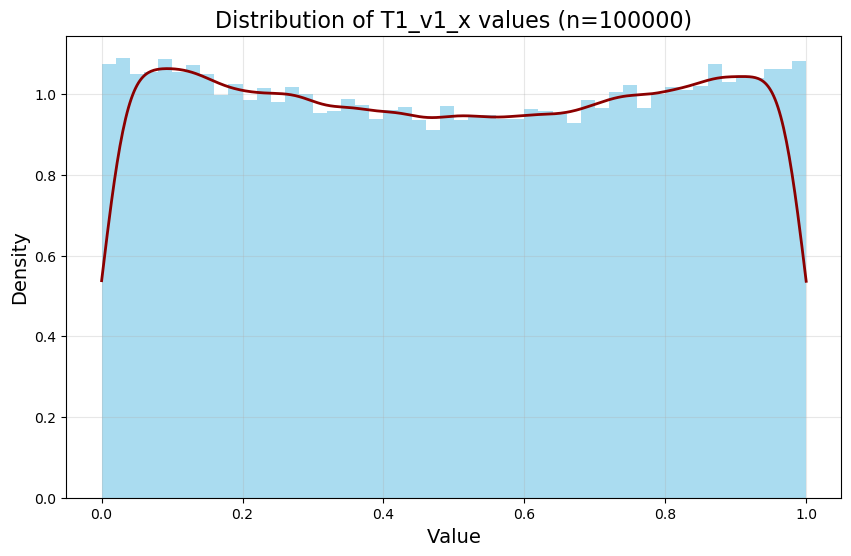

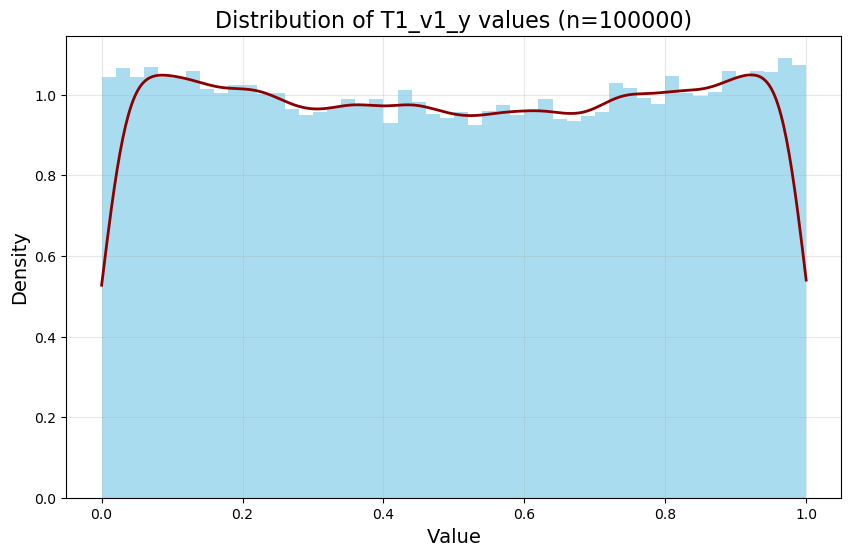

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### V1 - x

data_v1_x = np.ravel(tetrahedron_dataset['T1_v1_x'].to_numpy(copy=False))

plt.figure(figsize=(10, 6))
plt.hist(data_v1_x, bins=50, color='skyblue', density=True, alpha=0.7)

# Use KDE
kde = gaussian_kde(data_v1_x)
x = np.linspace(data_v1_x.min(), data_v1_x.max(), 500)
plt.plot(x, kde(x), color='darkred', lw=2)
# Formatting
plt.title(f'Distribution of T1_v1_x values (n={len(data_v1_x)})', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

### V1 - y

data_v1_y = np.ravel(tetrahedron_dataset['T1_v1_y'].to_numpy(copy=False))

plt.figure(figsize=(10, 6))
plt.hist(data_v1_y, bins=50, color='skyblue', density=True, alpha=0.7)

# Use KDE
kde = gaussian_kde(data_v1_y)
x = np.linspace(data_v1_y.min(), data_v1_y.max(), 500)
plt.plot(x, kde(x), color='darkred', lw=2)
# Formatting
plt.title(f'Distribution of T1_v1_y values (n={len(data_v1_y)})', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

#### Tetrahedron volume distribution

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### Get Data ###

def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

def extract_t2_vertices(row):
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ])

t1_volumes = []
t2_volumes = []
for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())

    t2_vertices = extract_t2_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t2_vertices)
    t2_volumes.append(volume.item())

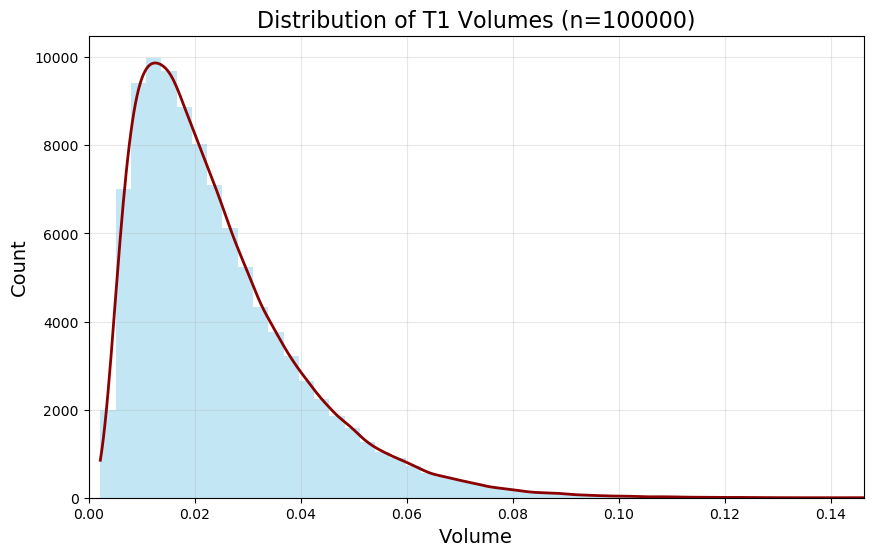

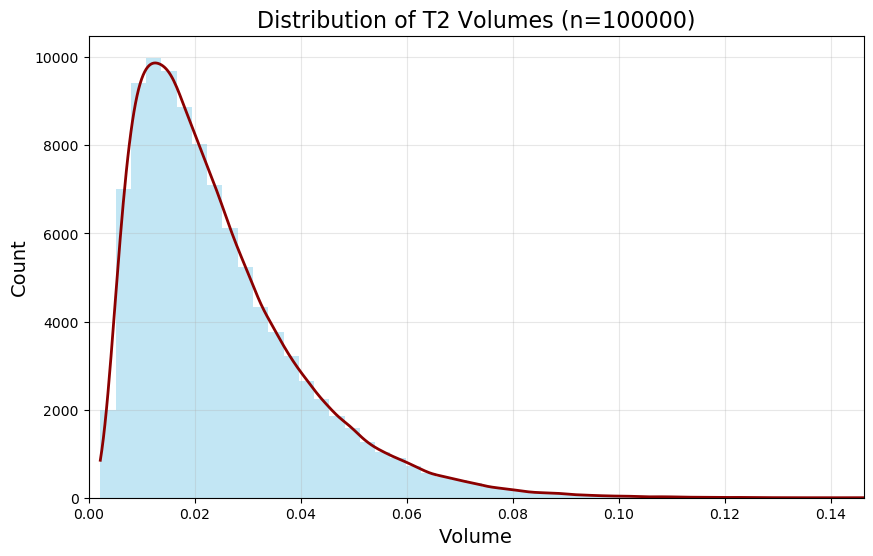

In [16]:

### T2 ###

volumes_t1 = np.array(t1_volumes).ravel()
plt.figure(figsize=(10, 6))

# Histogram
counts, bins, _ = plt.hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)

# KDE
kde = gaussian_kde(volumes_t1)
x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
plt.plot(x, kde(x)*len(volumes_t1)*(bins[1]-bins[0]), color='darkred', lw=2)

# Formatting
plt.title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlim(0, volumes_t1.max())
plt.grid(True, alpha=0.3)
plt.show()


### T2 ###

volumes_t2 = np.array(t1_volumes).ravel()
plt.figure(figsize=(10, 6))

# Histogram
counts, bins, _ = plt.hist(volumes_t2, bins=50, color='skyblue', alpha=0.5)

# KDE
kde = gaussian_kde(volumes_t2)
x = np.linspace(volumes_t2.min(), volumes_t2.max(), 500)
plt.plot(x, kde(x)*len(volumes_t2)*(bins[1]-bins[0]), color='darkred', lw=2)

# Formatting
plt.title(f'Distribution of T2 Volumes (n={len(volumes_t2)})', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlim(0, volumes_t2.max())
plt.grid(True, alpha=0.3)
plt.show()

#### Intersection volume distribution

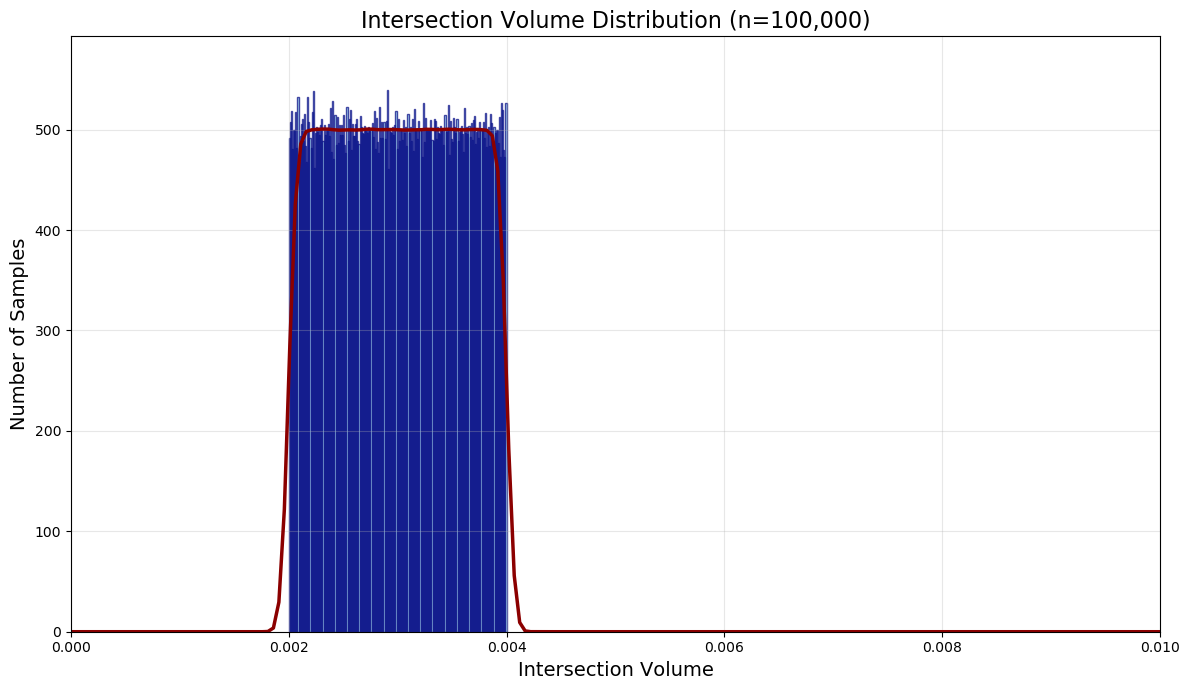

In [ ]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]
scaling_factor = 1000000
volumes = intersecting_cases['IntersectionVolume'].to_numpy() / scaling_factor
n_bins = 200
range_min = 0.002
range_max = 0.004
plt.figure(figsize=(12, 7))

# Use actual counts instead of density
counts, bins, patches = plt.hist(volumes, 
                                bins=n_bins,
                                range=(range_min, range_max),
                                color='skyblue',
                                edgecolor='navy',
                                alpha=0.7)

# Properly scaled KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(volumes)
x = np.linspace(0, 0.01, n_bins)
bin_width = bins[1] - bins[0]
plt.plot(x, kde(x) * len(volumes) * bin_width,
         color='darkred', 
         lw=2.5)

plt.title(f'Distribution Intersection Volume', fontsize=16)
plt.xlabel('Intersection Volume', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.xlim(0, 0.01)
plt.ylim(0, counts.max() * 1.1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()